<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Firm:
    def __init__(self, town, smallFirms, percentage ):
        self.town = town
        self.label = town + ':' + str(percentage)+':'+ str(smallFirms)
        self.smallFirms = smallFirms
        self.percentage  = percentage 

In [3]:
with open("firms_in_France.csv") as csvfile:
    reader = csv.reader(csvfile)
    print(next(reader))
    print(next(reader))

['CODGEO', 'town', 'REG', 'DEP', 'E14TST', 'E14TS0ND', 'E14TS1', 'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200', 'E14TS500', 'smallFirms', 'percentage ']
['75056', 'Paris', '11', '75', '427385', '316603', '76368', '14836', '10829', '5643', '1658', '812', '456', '180', '102033', '0.238737906']


In [4]:
Firms = []
with open("firms_in_France.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        town = row['town']
        smallFirms = row['smallFirms']
        percentage  = row['percentage ']
        Firms.append(Firm(town, int(smallFirms), float(percentage)))

In [5]:
FirmGraph = nx.Graph()

In [6]:
FirmGraph2 = nx.Graph()

In [7]:
for f in Firms:
    FirmGraph.add_node(f,label = f.label)

In [8]:
color=[]
for f1 in Firms: 
    for f2 in Firms:
        if not f1 == f2:
            if abs(f1.percentage - f2.percentage) < 0.01:
                FirmGraph.add_edge(f1,f2) 
                color.append('blue')
            if f1.smallFirms > 4000 and f2.smallFirms > 4000:
                FirmGraph.add_edge(f1,f2)
                color.append('orange') 

In [9]:
# color = []
# for f1 in Firms:
#     for f2 in Firms:
#         if f1 != f2:
#             if f1.percentage >0.27 and f2.percentage >0.27:
#                 FirmGraph.add_edge(f1,f2)
#                 color.append('orange')
#             if f1.percentage <=0.27 and f2.percentage <=0.27:
#                 FirmGraph.add_edge(f1,f2)
#                 color.append('grey')

In [9]:

labels = nx.get_node_attributes(FirmGraph, 'label')
# print(labels)

NetworkXError: random_state_index is incorrect

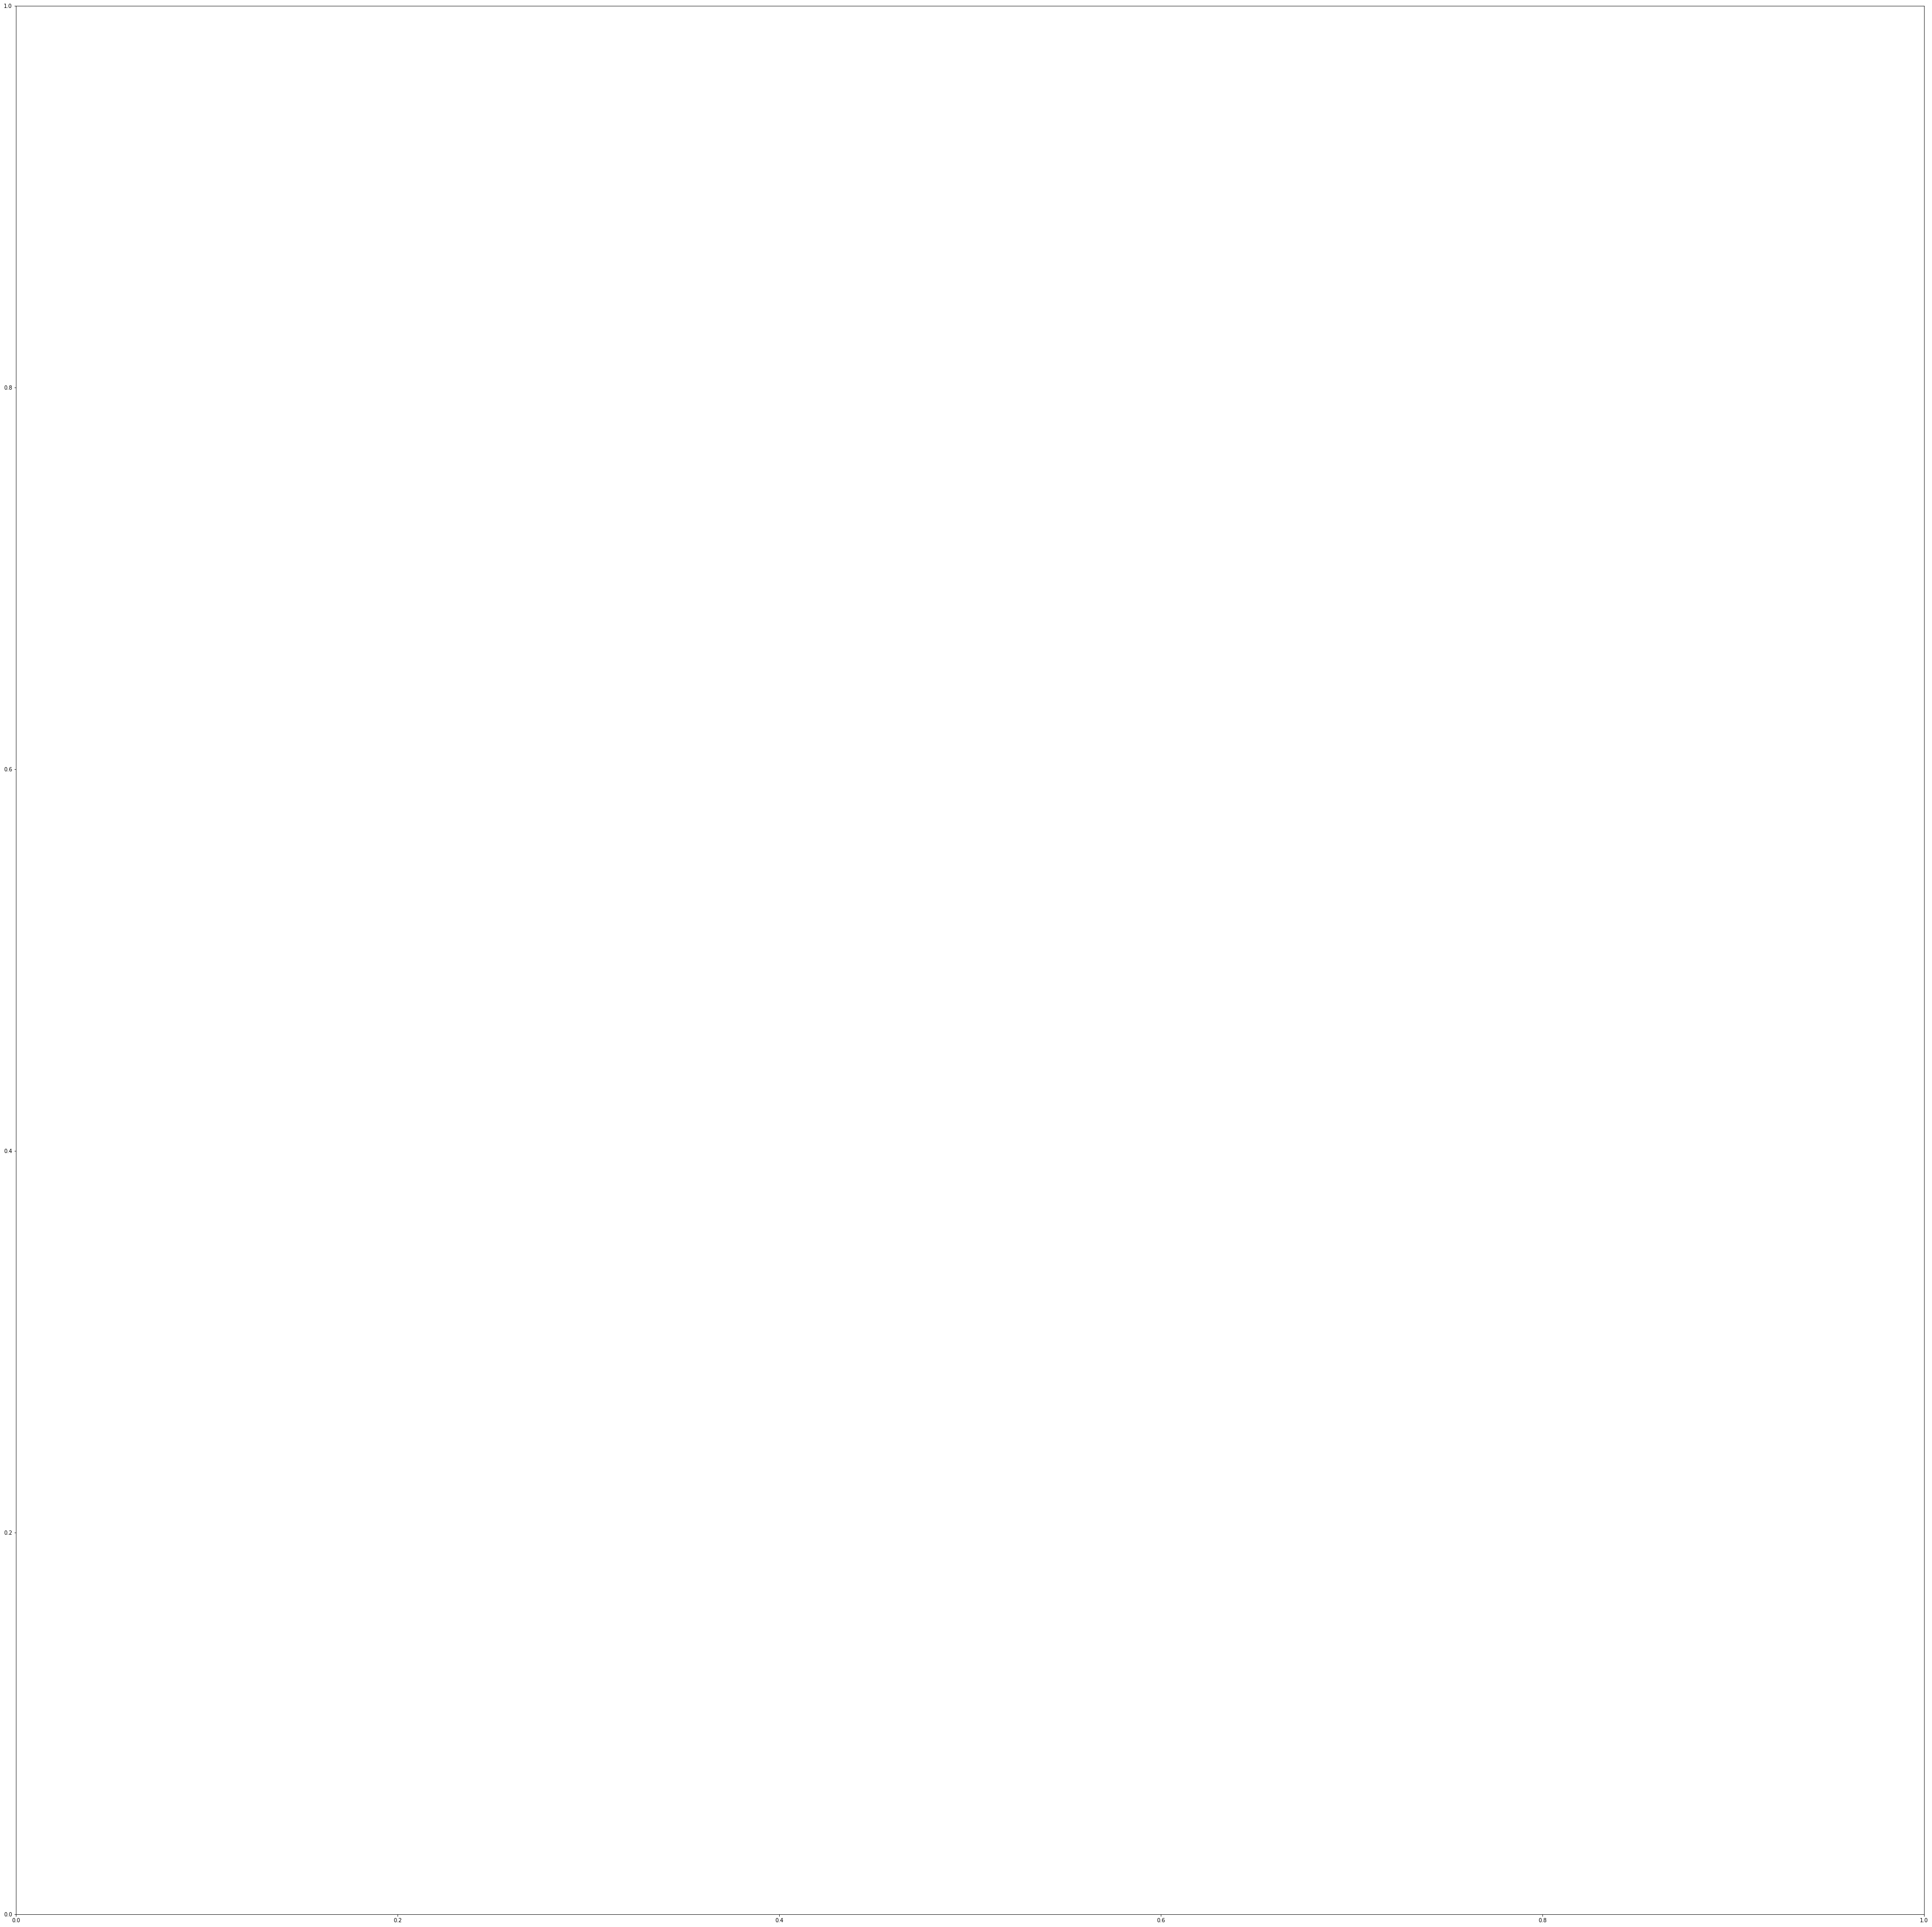

In [11]:
options = {'node_color':'red', 'node_size':100,'edge_color':color, 'width':1, 'labels':labels, 'with_labels': True}
plt.figure(1, figsize = (50, 50))
nx.draw(FirmGraph, **options)
# nx.draw(FirmGraph2, **options)